In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
customer_acq = pd.read_csv("C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/Customer Acqusition.csv")
repayment = pd.read_csv("C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/Repayment.csv")
spend = pd.read_csv("C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/spend.csv")

## 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values.

In [3]:
customer_acq.loc[customer_acq['Age'] < 18, 'Age'] = customer_acq['Age'].mean()

###  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [88]:
cust_spend = pd.merge(left = customer_acq, right = spend, on = 'Customer', how = 'inner')
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [5]:
cust_spend.loc[cust_spend['Amount'] > cust_spend['Limit'], ['Amount']] = (cust_spend['Limit'] * 50)/100

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [6]:
cust_repay = pd.merge(left = customer_acq, right = repayment, how = 'inner')
cust_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,NaN
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,NaN
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,NaN


In [7]:
cust_repay.loc[cust_repay['Amount'] > cust_repay['Limit'], ['Amount']] = cust_repay['Limit']

## 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?


In [8]:
customer_acq['Customer'].nunique()

100

### b. How many distinct categories exist?


In [9]:
customer_acq['Segment'].nunique()

5

### c. What is the average monthly spend by customers?


In [10]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [102]:
spend['Month'] = pd.to_datetime(spend['Month'])

In [103]:
import datetime as dt

In [104]:
spend['Monthly'] = spend['Month'].apply(lambda x : dt.datetime.strftime(x, format = '%B'))
spend['Yearly'] = spend['Month'].apply(lambda x : dt.datetime.strftime(x, format = '%Y'))
spend.groupby(['Yearly','Monthly']).mean()

Sl No:         Amount
Yearly Monthly                             
2004   April      730.500000  235272.037143
       February   749.500000  221215.270000
       January    751.622150  251712.068664
       March      725.500000  232146.119286
       May        733.500000  217539.236429
       November   745.500000  270486.397857
       September  741.500000  310923.383571
2005   April      730.000000  252181.326429
       August     749.500000  233734.634286
       December   762.500000  147503.060000
       February   750.666667  229802.279821
       January    746.500000  292741.372857
       July       757.500000  229116.663571
       June       755.500000  262688.112857
       May        747.300000  245696.515429
       November   749.500000  286143.322857
       October    760.500000  194568.640714
       September  759.500000  188666.202143
2006   April      744.414894  232468.967553
       August     770.500000  240699.717143
       December   774.500000  270470.980714
       February   757.833333  253858.260714
       January    763.500000  282058.006429
       July       754.500000  287505.098929
       June       768.500000  177252.386429
       March      750.903226  247166.084654
       May        744.250000  236162.740357
       November   758.500000  182841.290000
       October    772.500000  236136.335000
       September  771.500000  158520.090714

### d. What is the average monthly repayment by customers?


In [43]:
del repayment['Unnamed: 4']
del repayment['SL No:']

In [46]:
repayment.dropna(axis = 0, inplace = True)

In [47]:
repayment['Month'] = pd.to_datetime(repayment['Month'])

In [55]:
repayment['Monthly'] = repayment['Month'].apply(lambda x : dt.datetime.strftime(x, format = '%B'))
repayment['Yearly'] = repayment['Month'].apply(lambda x : dt.datetime.strftime(x, format = '%Y'))
repayment.groupby(['Yearly','Monthly']).mean()

Amount
Yearly Monthly                 
2004   April      259141.679000
       February   256702.630741
       January    243489.649786
       March      252585.280667
       May        226162.720800
       November   209592.238000
       September  184487.848750
2005   April      212688.631333
       August     264430.921622
       December   320379.335833
       February   238829.265123
       January    240548.098148
       July       239871.479167
       June       210199.818333
       May        263207.367857
       November   256695.120000
       October    219849.956667
       September  247700.170000
2006   April      275472.251889
       August     224143.992500
       December   252736.569167
       February   284489.565128
       January    293475.389167
       July       257936.383243
       June       251990.453333
       March      240851.266814
       May        256920.884943
       November   199399.197407
       October    260765.480000
       September  262533.880833

###  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [56]:
cust_spend_repay = pd.merge(left = cust_spend, right = repayment, on = 'Customer', how = 'inner')
cust_spend_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,Month_y,Amount_y,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2005-01-17,165972.88,January,2005


In [60]:
interest_data = cust_spend_repay.groupby(['Yearly','Monthly'])['Amount_x','Amount_y'].sum()
interest_data.head()

C:\Users\Sanjeet Gulia\AppData\Local\Temp\ipykernel_6152\2610998040.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_data = cust_spend_repay.groupby(['Yearly','Monthly'])['Amount_x','Amount_y'].sum()


Amount_x      Amount_y
Yearly Monthly                             
2004   April     1.194516e+08  2.285403e+08
       February  7.613922e+07  1.602419e+08
       January   1.088357e+09  1.699210e+09
       March     5.594171e+07  8.974470e+07
       May       8.800456e+07  1.411594e+08

In [65]:
interest_data['Monthly_Profit'] = interest_data['Amount_y'] - interest_data['Amount_x']
interest_data['Profit'] =  (interest_data['Monthly_Profit'] * 2.9) / 100
interest_data

Amount_x      Amount_y  Monthly_Profit        Profit
Yearly Monthly                                                            
2004   April      1.194516e+08  2.285403e+08    1.090887e+08  3.163572e+06
       February   7.613922e+07  1.602419e+08    8.410268e+07  2.438978e+06
       January    1.088357e+09  1.699210e+09    6.108525e+08  1.771472e+07
       March      5.594171e+07  8.974470e+07    3.380298e+07  9.802865e+05
       May        8.800456e+07  1.411594e+08    5.315485e+07  1.541491e+06
       November   5.504612e+07  7.860290e+07    2.355678e+07  6.831466e+05
       September  5.144278e+07  8.016122e+07    2.871844e+07  8.328349e+05
2005   April      9.366405e+07  1.747894e+08    8.112539e+07  2.352636e+06
       August     1.361400e+08  2.477449e+08    1.116049e+08  3.236542e+06
       December   4.348638e+07  9.944533e+07    5.595895e+07  1.622810e+06
       February   5.890557e+08  9.416163e+08    3.525606e+08  1.022426e+07
       January    1.324129e+08  1.810333e+08    4.862042e+07  1.409992e+06
       July       3.995653e+07  7.997268e+07    4.001615e+07  1.160468e+06
       June       1.174019e+08  2.213774e+08    1.039755e+08  3.015290e+06
       May        7.149030e+08  1.099197e+09    3.842944e+08  1.114454e+07
       November   1.532278e+08  2.763119e+08    1.230841e+08  3.569438e+06
       October    3.140993e+07  6.027830e+07    2.886837e+07  8.371827e+05
       September  3.195551e+07  7.530449e+07    4.334898e+07  1.257121e+06
2006   April      3.229722e+08  6.093666e+08    2.863944e+08  8.305437e+06
       August     5.849630e+07  7.167032e+07    1.317402e+07  3.820465e+05
       December   4.585222e+07  7.087702e+07    2.502480e+07  7.257193e+05
       February   1.654843e+08  2.903280e+08    1.248436e+08  3.620465e+06
       January    5.127574e+07  8.974491e+07    3.846917e+07  1.115606e+06
       July       1.444093e+08  2.245720e+08    8.016271e+07  2.324719e+06
       June       5.302118e+07  6.914431e+07    1.612313e+07  4.675707e+05
       March      7.393854e+08  1.115725e+09    3.763400e+08  1.091386e+07
       May        3.297954e+08  5.434823e+08    2.136869e+08  6.196920e+06
       November   1.124836e+08  1.355832e+08    2.309955e+07  6.698869e+05
       October    5.285823e+07  7.890924e+07    2.605102e+07  7.554795e+05
       September  5.395681e+07  8.083199e+07    2.687518e+07  7.793803e+05

### f. What are the top 5 product types?


In [73]:
spend['Type'].value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

### g. Which city is having maximum spend?


In [79]:
cust_spend.groupby('City')['Amount'].max().sort_values(ascending = False)

City
CALCUTTA      499270.00
BOMBAY        497770.15
CHENNAI       497368.07
PATNA         496185.13
COCHIN        494457.44
BANGALORE     486794.37
TRIVANDRUM    485795.37
DELHI         468684.01
Name: Amount, dtype: float64

###  h. Which age group is spending more money?

In [93]:
cust_spend['age_group'] =  pd.cut(cust_spend.Age, bins = np.arange(15, 95, 10),
                                  labels = ['15-25','25-35','35-45','45-55','55-65','65-75','75-85'], include_lowest = True)
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,age_group
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,75-85
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,75-85
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,75-85
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,75-85
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,75-85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,45-55
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,55-65
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,45-55
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,25-35


In [96]:
cust_spend.groupby('age_group')['Amount'].max().sort_values(ascending = False).head(1)

age_group
25-35    499793.49
Name: Amount, dtype: float64

### i. Who are the top 10 customers in terms of repayment?


In [98]:
repayment.groupby('Customer')['Amount'].sum().sort_values(ascending = False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A22     9372561.68
A21     9056336.15
A43     8489871.46
A45     8448334.87
A12     8334760.16
A48     8292416.75
A14     7943268.63
Name: Amount, dtype: float64

## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

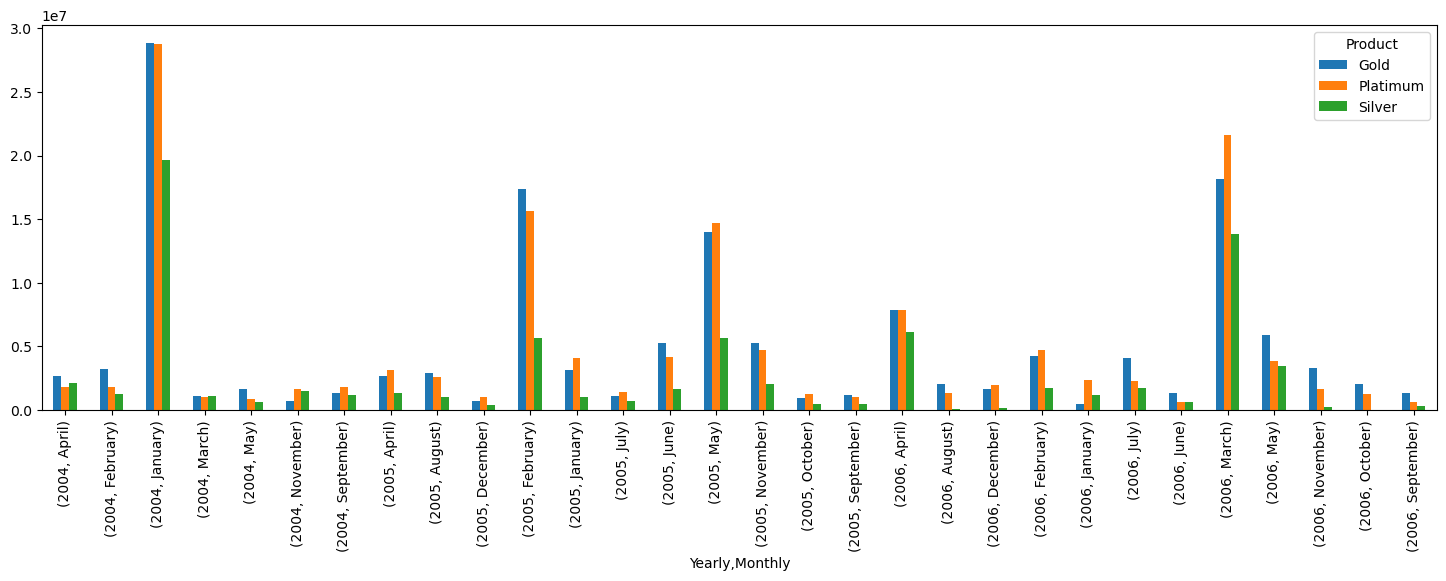

In [120]:
cust_spend = pd.merge(left = customer_acq, right = spend, on = 'Customer', how = 'inner')

yearly_spend_smry = cust_spend.pivot_table(index = ['Yearly','Monthly'], columns = 'Product', values = 'Amount', aggfunc = 'sum')

yearly_spend_smry.plot(kind = 'bar', figsize = (18,5))
plt.show()

## 4. Create graphs for
### a. Monthly comparison of total spends, city wise


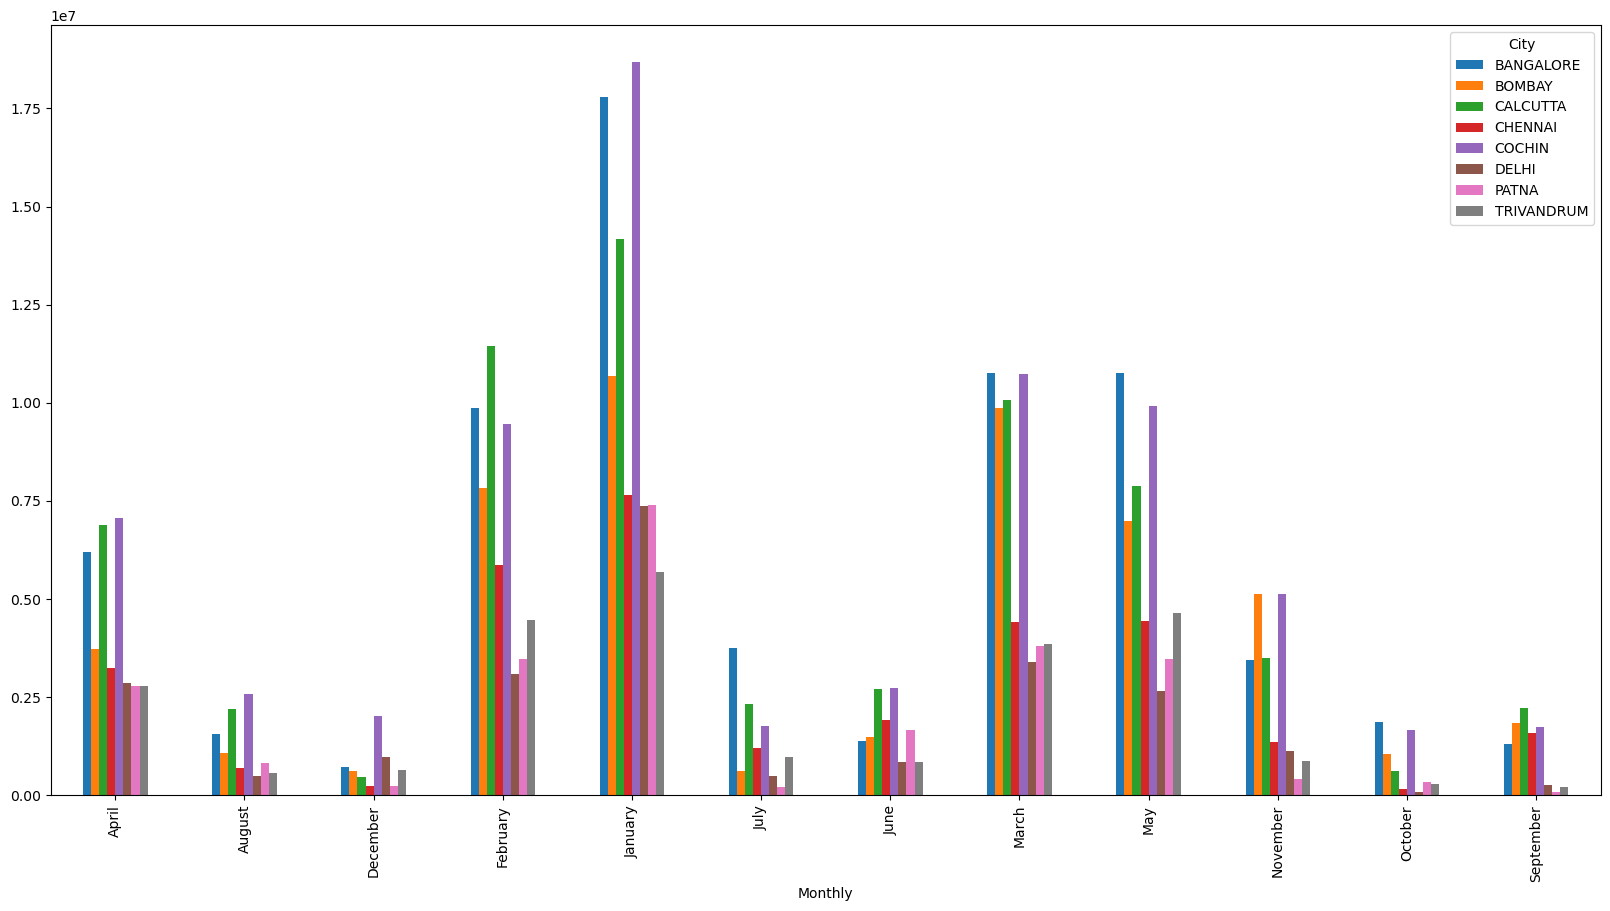

In [129]:
monthly_spend = cust_spend.pivot_table(index = 'Monthly', columns = 'City', values = 'Amount', aggfunc = 'sum')

monthly_spend.plot(kind = 'bar', figsize = (20,10))
plt.show()

###  b. Comparison of yearly spend on air tickets

In [143]:
air_tkt = cust_spend.groupby(['Yearly','Type'])['Amount'].sum().reset_index()

air_tkt_spnd = air_tkt.loc[air_tkt['Type'] == 'AIR TICKET']
air_tkt_spnd

,Yearly,Type,Amount
0,2004,AIR TICKET,8370914.59
15,2005,AIR TICKET,14495718.73
30,2006,AIR TICKET,10088812.10


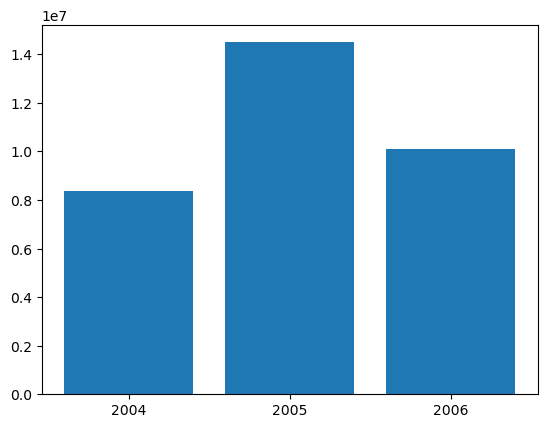

In [148]:
plt.bar(air_tkt_spnd['Yearly'], height = air_tkt_spnd['Amount'])
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

<AxesSubplot:xlabel='Monthly'>

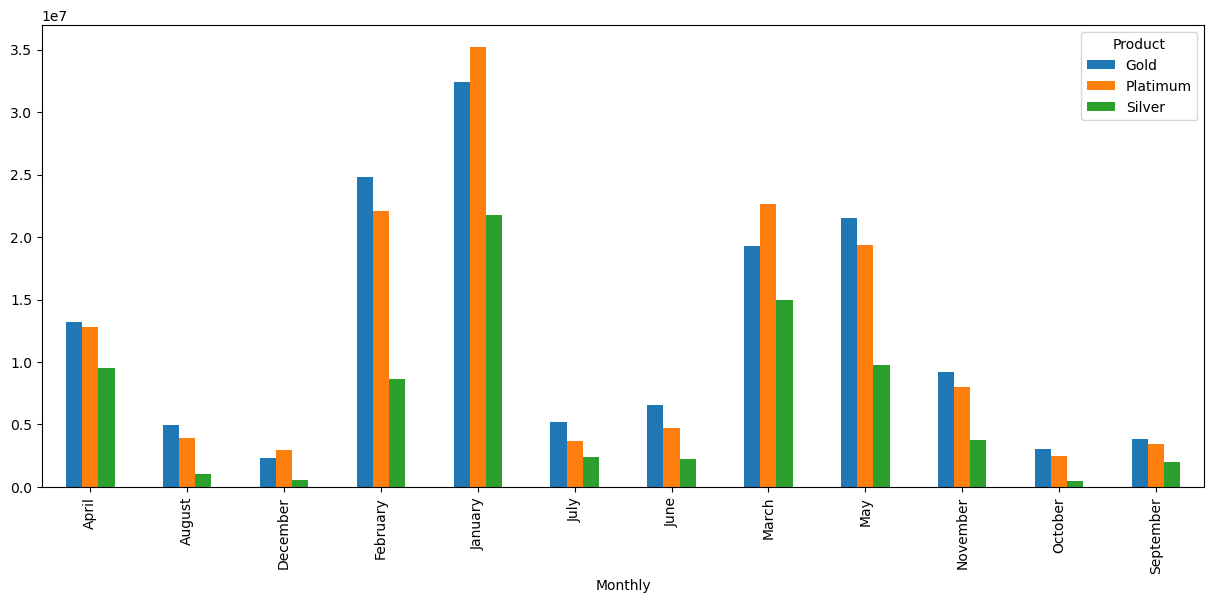

In [153]:
prod_spend = cust_spend.pivot_table(index = 'Monthly',columns = 'Product', values = 'Amount', aggfunc = 'sum')

prod_spend.plot(kind = 'bar', figsize = (15,6))

## 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [212]:
cust_repay = pd.merge(left = customer_acq, right = repayment, how = 'inner')
cust_repay.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Monthly,Yearly
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January,2004


In [210]:
def report(product, timeformat):
    
    if product == 'Gold' and timeformat == 'Monthly':
        pivot = cust_repay.pivot_table(index= ['Product','City','Customer'], columns= 'Monthly', values = 'Amount', aggfunc= 'sum')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product == 'Gold' and timeformat == 'Yearly':
        pivot = cust_repay.pivot_table(index= ['Product','City','Customer'], columns= 'Yearly', values = 'Amount', aggfunc= 'sum')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product == 'Silver' and timeformat == 'Monthly':
        pivot = cust_repay.pivot_table(index= ['Product','City','Customer'], columns= 'Monthly', values = 'Amount', aggfunc= 'sum')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product == 'Silver' and timeformat == 'Yearly':    
        pivot = cust_repay.pivot_table(index= ['Product','City','Customer'], columns= 'Yearly', values = 'Amount', aggfunc= 'sum')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product == 'Platimum' and timeformat == 'Monthly':
        pivot = cust_repay.pivot_table(index= ['Product','City','Customer'], columns= 'Monthly', values = 'Amount', aggfunc= 'sum')
        result = pivot.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product == 'Platimum' and timeformat == 'Yearly':
        pivot = cust_repay.pivot_table(index= ['Product','City','Customer'], columns= 'Yearly', values = 'Amount', aggfunc= 'sum')
        result = pivot.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
        
    return result       
        

In [211]:
report('Gold','Yearly')

Yearly                             2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2359797.84  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A63        788855.60         NaN   211117.12
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A90              NaN         NaN   109931.32
                   A94        153465.89         NaN         NaN
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN